bounds to:  20.0
bounds to:  (40.0, 30.0, 80.0, 70.0)


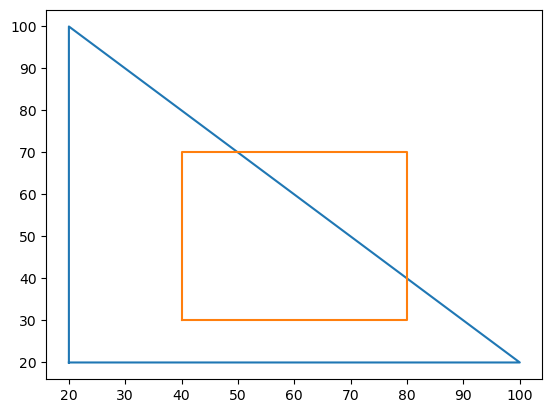

POLYGON ((20 20, 100 20, 20 100, 20 20))
POLYGON ((40 30, 40 70, 80 70, 80 30, 40 30))


In [1]:
### --- Overlapping bez metody! --- ###

import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.ops import unary_union #nowa funkcja i bilbio

fig, ax  = plt.subplots()

#ZESTAW I - prostokąt + kwadrat
#poly_1 = Polygon([(20, 20), (50, 20), (50, 40), (20, 40)])
#poly_2 = Polygon([(40, 30), ( 40, 70), (80, 70), (80, 30)])

#ZESTAW II - trójkąt + prostokąt
poly_1 = Polygon([(20,20), (100,20), (20,100)])
poly_2 = Polygon([(40, 30), ( 40, 70), (80, 70), (80, 30)])

x1, y1 = poly_1.exterior.xy
x2, y2 = poly_2.exterior.xy

ax.plot(x1, y1) 
ax.plot(x2, y2)  

minx, miny, maxx, maxy = poly_1.bounds
dupa1 = poly_2.bounds
print("bounds to: ", minx) 
print("bounds to: ", dupa1)

plt.show()
print(poly_1)
print(poly_2)

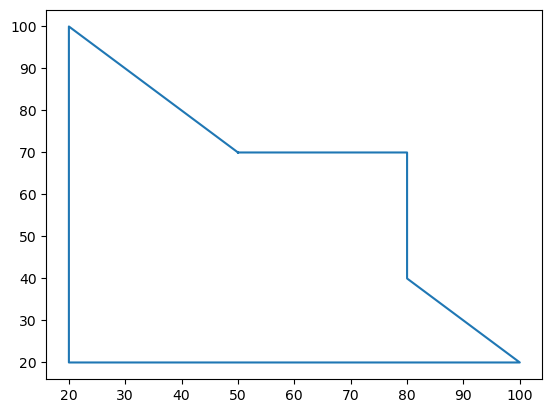

POLYGON ((50 70, 80 70, 80 40, 100 20, 20 20, 20 100, 50 70))
POLYGON ((20 20, 100 20, 20 100, 20 20))


In [13]:
# Próba #2 Rozwiązanie Overlappingu z metodą unary_union 
fig, ax  = plt.subplots()

poly_1 = Polygon([(20,20), (100,20), (20,100)])
poly_2 = Polygon([(40, 30), ( 40, 70), (80, 70), (80, 30)])

polygons = [poly_1, poly_2]

polygons_merge = unary_union(polygons)

x, y = polygons_merge.exterior.xy

ax.plot(x,y) 
plt.show()

print(polygons_merge) 


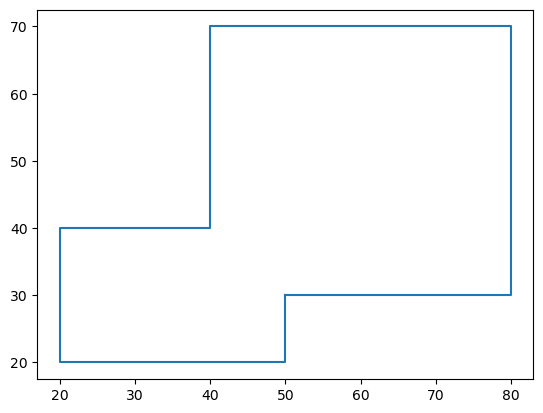

POLYGON ((50 30, 50 20, 20 20, 20 40, 40 40, 40 70, 80 70, 80 30, 50 30))


In [3]:
fig, ax  = plt.subplots()

poly_1 = Polygon([(20, 20), (50, 20), (50, 40), (20, 40),])
poly_2 = Polygon([(40, 30), ( 40, 70), (80, 70), (80, 30)])

polygons = [poly_1, poly_2]

polygons_merge = unary_union(polygons)

x, y = polygons_merge.exterior.xy

ax.plot(x,y) 
plt.show()

print(polygons_merge) 

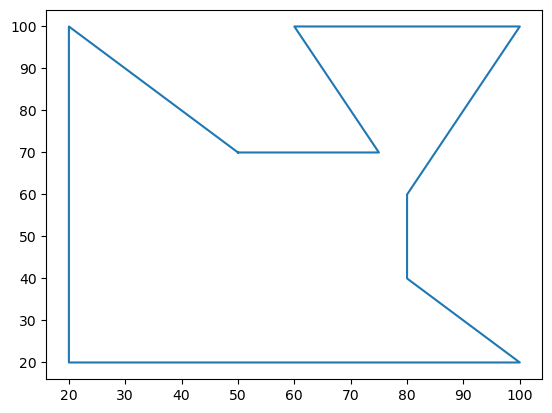

POLYGON ((50 70, 75 70, 60 100, 100 100, 80 60, 80 40, 100 20, 20 20, 20 100, 50 70))


In [4]:
# Próba #3 Rozwiązanie Overlappingu z metodą unary_union na trzech bryłach i więcej.  
fig, ax  = plt.subplots()

poly_1 = Polygon([(20,20), (100,20), (20,100)])
poly_2 = Polygon([(40, 30), ( 40, 70), (80, 70), (80, 30)])
poly_3 = Polygon([(100,100), (80,60), (60,100)])
polygons = [poly_1, poly_2, poly_3]

polygons_merge = unary_union(polygons)

x, y = polygons_merge.exterior.xy

ax.plot(x,y) 
plt.show()

print(polygons_merge) 

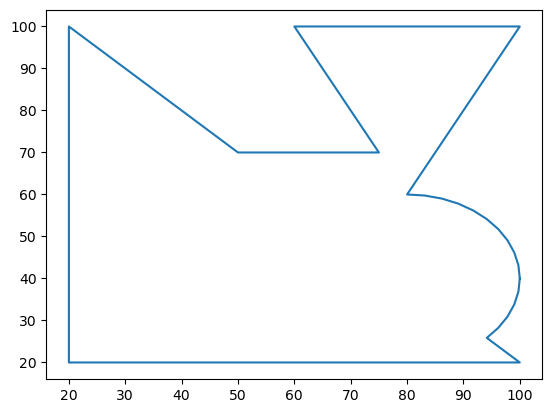

POLYGON ((100 40, 99.75376681190275 36.87131069919538, 99.02113032590307 33.81966011250105, 97.82013048376736 30.92019000520907, 96.18033988749896 28.24429495415055, 94.14213562373097 25.85786437626906, 94.14213562373095 25.85786437626905, 100 20, 80.00000000000004 20, 20 20, 20 100, 50 70, 75 70, 60 100, 100 100, 80 60, 80 59.99999999999999, 83.12868930080457 59.75376681190276, 86.18033988749889 59.02113032590309, 89.07980999479088 57.82013048376739, 91.75570504584941 56.18033988749898, 94.14213562373091 54.14213562373099, 96.18033988749892 51.75570504584951, 97.82013048376733 49.07980999479098, 99.02113032590304 46.180339887499, 99.75376681190275 43.12868930080467, 100 40))


shapely.geometry.polygon.Polygon

In [5]:
# Próba #4 z kołem. Rozwiązanie Overlappingu z metodą unary_union na trzech bryłach i więcej.  

#dodanie biblioteki
from shapely.geometry import Point
import math
fig, ax  = plt.subplots()

poly_1 = Polygon([(20,20), (100,20), (20,100)])
poly_2 = Polygon([(40, 30), ( 40, 70), (80, 70), (80, 30)])
poly_3 = Polygon([(100,100), (80,60), (60,100)])
poly_4 = Point(80,40).buffer(20, resolution=10)

polygons = [poly_1, poly_2, poly_3, poly_4]

polygons_merge = unary_union(polygons)

x, y = polygons_merge.exterior.xy

ax.plot(x,y) 
plt.show()


print(polygons_merge)
type(polygons_merge)

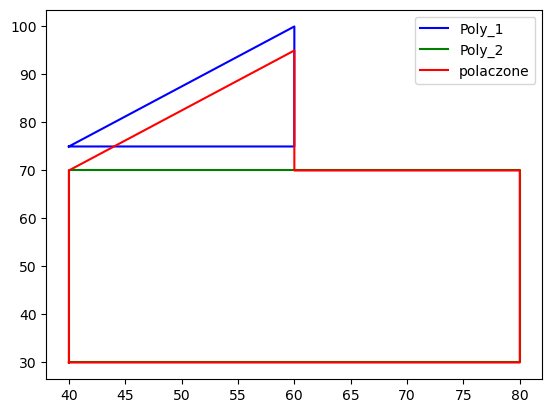

Poloczone_punkty: POLYGON ((40 30, 40 70, 60 95, 60 70, 80 70, 80 30, 40 30))
Poly 1: 250.0
Poly 2: 1600.0
Poly 1 + Poly 2: 1850.0
Pole_polaczonej: 1850.0
Jest w pytę


In [27]:
### --- scalanie brył na przykładzie dwóch brył --- ###

# catch/try/except - dodać wyjątki np. kolizji wielu brył (np. 4 prostokaty w uladzie 2x2) 
# Po konsultacji z Mateuszem, pasuje zmienić prog na 

from shapely.geometry import Polygon, Point
from shapely.affinity import translate
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import math


# funkcja zwracajaca odlegosci euklideswoej pozniej posluzy do przesuniecie punktow o roznice odleglosc
def square(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return (x2 - x1)**2 + (y2 - y1)**2
    
# 4 parametr funkcji to próg/treshhold - punkt odlegosc od kiedy warunek przyłączenia do bryly ma zostać spełniony. Exterior.coords!!
def align_polygons(poly_1, poly_2, poly_3, prog=10): 
    for p1 in poly_1.exterior.coords:
        for p2 in poly_2.exterior.coords:
            if math.sqrt(square(p1, p2)) < prog:
                dx, dy = p2[0] - p1[0], p2[1] - p1[1] # linijka ze stackover
                return translate(poly_1, xoff=dx, yoff=dy) # przesuniecie ofset
    return poly_1

#przykłady bryl
poly_1 = Polygon([(40,75), (60,75), (60,100)])
poly_2 = Polygon([(40, 30), (40, 70), (80, 70), (80, 30)])
#poly_3 = Polygon([(70, 75), (85, 75), (85, 100)])

poly_1_aligned = align_polygons(poly_1, poly_2, poly_3, prog=10)
merged_polygon = unary_union([poly_1_aligned, poly_2])


fig, ax = plt.subplots()

#DO legenda-tylko pod ogarniecie czy git czy chujnia
x1, y1 = poly_1.exterior.xy
ax.plot(x1, y1, label='Poly_1', color='blue')
x3, y3 = poly_2.exterior.xy
ax.plot(x3, y3, label='Poly_2', color='green')
#x2, y2 = poly_3.exterior.xy
#ax.plot(x2, y2, label='Poly_3', color='yellow')
x4, y4 = merged_polygon.exterior.xy
ax.plot(x4, y4, label='polaczone', color='red')
ax.legend()

plt.show()
# test 
print("Poloczone_punkty:", merged_polygon)
suma = poly_1.area + poly_2.area

print("Poly 1:", poly_1.area)
print("Poly 2:", poly_2.area)
print("Poly 1 + Poly 2:", suma) 

print("Pole_polaczonej:", merged_polygon.area)

if suma == merged_polygon.area: 
    print("Jest w pytę")

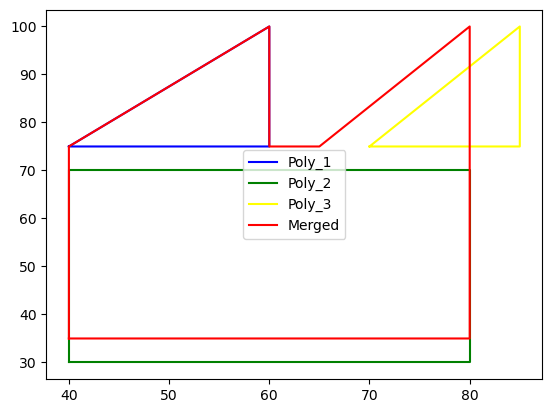

Połączone_wierzchołki_złączonych_brył: POLYGON ((40 35, 40 75, 60 100, 60 75, 65 75, 80 100, 80 75, 80 35, 40 35))
Suma wszystkich' pole: 2037.5
Pole zlaczonych' pole: 2037.5
Jest w pytę, pola ok.


In [24]:
### --- funckja działająca na grupie --- ###

# 1 funkcja uogólniona która iteruje po każdej bryle np. zbiorze, grupie.
# 2 mam problem z implemenotwaniem tego w API, więc zostawie to na czym skończyłem. 
# 3 Po konsultacji z Mateuszem, kalkulator/edytor nie będzie uwzględniał/pozwalał na przecinanie się brył.

from shapely.geometry import Polygon
from shapely.affinity import translate
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import math

#to samo co 
def square(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return (x2 - x1)**2 + (y2 - y1)**2

#shermetyzowanie funkcji do dwoch parametrow grupa + progowanie) 
def align_polygons(polygons, prog=10): 
    aligned_polygons = [polygons[0]]  # zaczynamy od pierwszego wielokąta
    
    for i in range(1, len(polygons)):
        poly_to_align = polygons[i]
        aligned = False
        
        for aligned_poly in aligned_polygons:
            for p1 in poly_to_align.exterior.coords:
                for p2 in aligned_poly.exterior.coords:
                    if math.sqrt(square(p1, p2)) < prog:
                        dx, dy = p2[0] - p1[0], p2[1] - p1[1] # linijka ze stacoverflow
                        aligned_poly_translated = translate(poly_to_align, xoff=dx, yoff=dy)
                        aligned_polygons.append(aligned_poly_translated)
                        aligned = True
                        break
                if aligned:
                    break
            if aligned:
                break
        
        if not aligned:
            aligned_polygons.append(poly_to_align)
    
    return unary_union(aligned_polygons)

# przykłady brył
poly_1 = Polygon([(40, 75), (60, 75), (60, 100)])
poly_2 = Polygon([(40, 30), (40, 70), (80, 70), (80, 30)])
poly_3 = Polygon([(70, 75), (85, 75), (85, 100)])


#Stworzenie grupy i przekazanie do zmiennej
polygons = [poly_1, poly_2, poly_3]
merged_polygon = align_polygons(polygons, prog=10)

fig, ax = plt.subplots()

colors = ['blue', 'green', 'yellow', 'red']
labels = ['Poly_1', 'Poly_2', 'Poly_3', 'polaczone']

for i, poly in enumerate(polygons + [merged_polygon]):
    x, y = poly.exterior.xy
    ax.plot(x, y, label=labels[i], color=colors[i])
    
ax.legend()
plt.show()

# Test
print("Połączone_wierzchołki_złączonych_brył:", merged_polygon)
suma = sum([poly.area for poly in polygons])

print("Suma wszystkich' pole:", suma)
print("Pole zlaczonych' pole:", merged_polygon.area)

#sprawdzenie wielkości pol - 
if suma == merged_polygon.area:
    print("Jest w pytę, pola ok.")
else:
    print("chunia, pola się nie zgadzają")

<function matplotlib.pyplot.gca() -> 'Axes'>

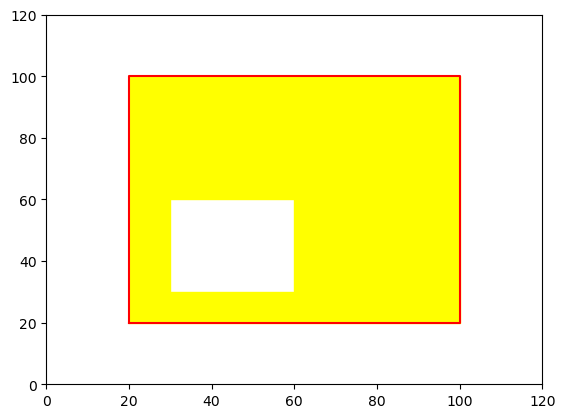

In [23]:
### ---- Wycinanie okna - test ----- ####

# Próba wycinania patches - przyklad do okna dachowego 
# działa do granic exterior.coords) - testy na figura_2
# brakło mi czasu na sprowadzenie kodu do ogolnej postaci funkcji (heremtyzacja) 

import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.collections import PatchCollection

figura_1 = Polygon([(20, 20), (20, 100), (100, 100), (100, 20)])
figura_2 = Polygon([(30, 30), (30, 60), (60, 60), (60, 30)])

figura_wynikowa = figura_1.difference(figura_2)

fig, ax = plt.subplots()

x1, y1 = figura_1.exterior.xy
ax.plot(x1, y1, label='figura_1', color='red')

patches = []
exterior_coords = list(figura_wynikowa.exterior.coords)
interior_coords = [list(interior.coords) for interior in figura_wynikowa.interiors]
patches.append(MplPolygon(exterior_coords, closed=True, edgecolor='yellow', facecolor='yellow'))

for interior in interior_coords:
    patches.append(MplPolygon(interior, closed=True, edgecolor='yellow', facecolor='white'))

p = PatchCollection(patches, match_original=True)
ax.add_collection(p)

plt.xlim(0, 120)
plt.ylim(0, 120)
plt.gca

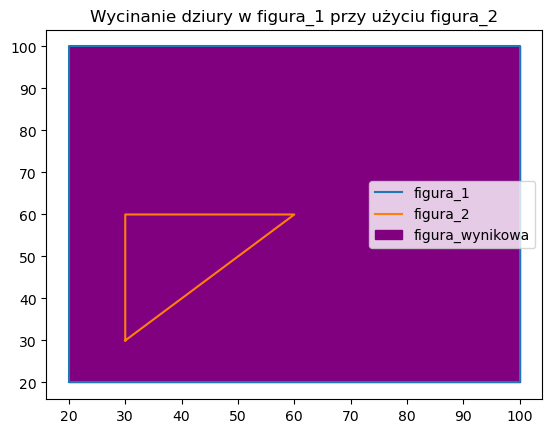

figura_1: POLYGON ((20 20, 20 100, 100 100, 100 20, 20 20))
figura_2: POLYGON ((30 30, 30 60, 60 60, 30 30))
figura_wynikowa: POLYGON ((20 20, 20 100, 100 100, 100 20, 20 20), (30 30, 60 60, 30 60, 30 30))


In [9]:
### -- stare -- ##

import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Definiowanie dwóch wielokątów
figura_1 = Polygon([(20, 20), (20, 100), (100, 100), (100, 20)])
figura_2 = Polygon([(30, 30), (30, 60), (60, 60)])

# Wycinanie dziury w figura_1 przy użyciu figura_2
figura_wynikowa = figura_1.difference(figura_2)

# Rysowanie figur
fig, ax = plt.subplots()

# Współrzędne figura_1
x1, y1 = figura_1.exterior.xy
ax.plot(x1, y1, label='figura_1')

# Współrzędne figura_2
x2, y2 = figura_2.exterior.xy
ax.plot(x2, y2, label='figura_2')

# Współrzędne figura_wynikowa
x3, y3 = figura_wynikowa.exterior.xy
ax.fill(x3, y3, color='purple', label='figura_wynikowa')  # Rysowanie wynikowej figury w kolorze fioletowym

# Ustawienia wykresu
ax.legend()
ax.set_title('Wycinanie dziury w figura_1 przy użyciu figura_2')
plt.show()

# Drukowanie wynikowych figur
print("figura_1:", figura_1)
print("figura_2:", figura_2)
print("figura_wynikowa:", figura_wynikowa)


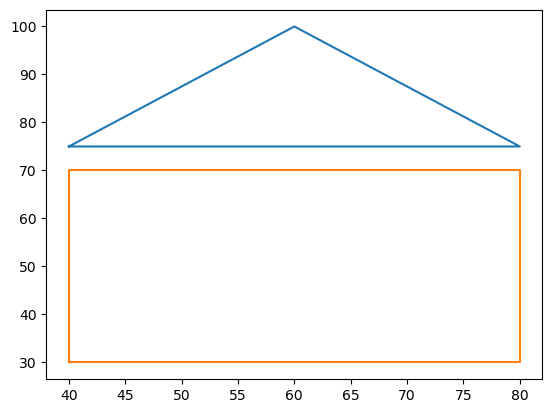

POLYGON ((40 75, 80 75, 60 100, 40 75))
POLYGON ((40 30, 40 70, 80 70, 80 30, 40 30))


In [7]:
### -- Stare -- ###
# punkty sąsiedznie Overlapping bez metody!

import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.ops import unary_union #nowa funkcja i bilbio

fig, ax  = plt.subplots()

#ZESTAW I - prostokąt + kwadrat
#poly_1 = Polygon([(20, 20), (50, 20), (50, 40), (20, 40)])
#poly_2 = Polygon([(40, 30), ( 40, 70), (80, 70), (80, 30)])

#ZESTAW II - trójkąt + prostokąt
poly_1 = Polygon([(40,75), (80,75), (60,100)])
poly_2 = Polygon([(40, 30), ( 40, 70), (80, 70), (80, 30)])

x1, y1 = poly_1.exterior.xy
x2, y2 = poly_2.exterior.xy

ax.plot(x1, y1) 
ax.plot(x2, y2)  

plt.show()
print(poly_1)
print(poly_2)

In [ ]:
?